## Оглавление:
* Цель работы
* Задачи
* Описание технологического процесса
* Описание данных
* Некоторые разумные предположения о зависимостях и свойствах признаков на основе физико-химических процессов -
* Анализ данных
* Кластеризация методом стохастического вложения соседей с t-распределением
* Кластеризация методом DBSCAN
* Оценка человеческого фактора - 
* Поиск выбросов алгоритмом Isolation Forest
* Подготовка данных для обучения. Обучающая и тестовая выборки -
* Выбор и построение модели для предсказания целевой переменной -
* Random Forest Regressor -
* Простая полносвязная нейронная сеть -
* Валидация и иочность моделей -
* Выводы - 
* Итог -

# Цель работы
Определить возможные направления улучшения технологического процесса для увеличения процента выхода продукции с низкими удельными магнитными потерями.

# Задачи 
* Определить проблемы с данными по параметрам технологического процесса (70%)
* Определить наиболее важные этапы и параметры технологического процесса, влияющие на качество продукции (30%)
* Описание обнаруженных проблем с исходными данными и способов их преодоления
* Таблица с ТОП-20 признаков, на которых достигается максимальное качество модели:

Этап процесса\
Формула расчёта/метод обработки\
Важность признака

* Сводная таблица по сформированным моделям и их точности

# Описание технологического процесса
* Производство ВПС начинается с плавки
* Расплав разливается на заготовки (слябы)
* Из сляба производится горячекатаный рулон
* Горячекатаный рулон нормализуется и отправляется на холодный прокат
* Холоднокатаный рулон обезуглероживается
## Замечания
* Одной плавке соответствует несколько рулонов
* В процессе обработки рулоны могут разрезаться (из длинного получается несколько коротких)
* Каждый рулон имеет свою длину, толщину, ширину

# Анализ данных
* Смотрим на данные. Предварительные наблюдения для предварительных сведений.
* Анализ целевой переменной.
* Анализ пропущенных значений.
* Анализ выбросов.
* Поиск дубликатов.

In [769]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#data_xls.to_csv('dataset.csv', encoding='utf-8', index=False)
data = pd.read_csv(r"Dataset.csv", sep=';', header=0,
                   index_col=False, encoding='cp1251')

In [770]:
data.head(10)

,Индекс,Номер партии,Номер партии_АСУТП,Номер плавки,Номер рулона,Длина_1,Длина_2,Длина_3,Длина_4,Длина_5,...,Водород_среднее,CO2_Этап2_зона5,H2_Этап2_зона5,Точка_росы_Этап1_зона1,Точка_росы_Этап1_зона2,CO_Этап1_зона1,CO_Этап1_зона2,H2_Этап1,CO2_Этап2_зона1,CO2_Этап2_зона3
0,0,522350,580797,1717428,70,23.28,2214.0,55.600000,5111.880000,121.760000,...,1.7,1.22,69.7,NaN,63.680000,NaN,1.600000,69.750000,0.1,0.06
1,1,522350,580797,1717428,70,25.22,2211.0,60.233333,5104.953333,131.906667,...,1.9,1.22,70.8,NaN,63.680000,NaN,1.600000,69.750000,0.1,0.06
2,2,522350,580797,1717428,70,27.16,2208.0,64.866667,5098.026667,142.053333,...,2.2,1.25,69.9,NaN,63.678693,NaN,1.600000,69.750000,0.1,0.06
3,3,522350,580797,1717428,70,29.10,2205.0,69.500000,5091.100000,152.200000,...,1.5,2.81,69.1,NaN,63.668600,NaN,1.600000,69.750000,0.1,0.06
4,4,522350,580797,1717428,70,31.04,2202.0,74.133333,5084.173333,162.346667,...,1.2,1.49,71.9,NaN,63.658507,NaN,1.600000,69.750000,0.1,0.06
5,5,522350,580797,1717428,70,32.98,2199.0,78.766667,5077.246667,172.493333,...,1.7,2.22,70.2,NaN,63.650000,NaN,1.600000,69.750000,0.1,0.06
6,6,522350,580797,1717428,70,34.92,2196.0,83.400000,5070.320000,182.640000,...,2.3,2.52,70.8,NaN,63.655040,NaN,1.598320,69.744960,0.1,0.06
7,7,522350,580797,1717428,70,36.86,2193.0,88.033333,5063.393333,192.786667,...,2.1,1.67,69.5,NaN,63.688867,NaN,1.588227,69.714680,0.1,0.06
8,8,522350,580797,1717428,70,38.80,2190.0,92.666667,5056.466667,202.933333,...,1.5,2.61,70.9,NaN,63.743067,NaN,1.580000,69.691867,0.1,0.06
9,9,522350,580797,1717428,70,40.74,2187.0,97.300000,5049.540000,213.080000,...,2.0,1.71,70.2,NaN,63.798040,NaN,1.580000,69.700000,0.1,0.06


In [771]:
data.info

<bound method DataFrame.info of        Индекс  Номер партии  Номер партии_АСУТП  Номер плавки  Номер рулона  \
0           0        522350              580797       1717428            70   
1           1        522350              580797       1717428            70   
2           2        522350              580797       1717428            70   
3           3        522350              580797       1717428            70   
4           4        522350              580797       1717428            70   
...       ...           ...                 ...           ...           ...   
12786   12786        522380              580815       1717423            40   
12787   12787        522380              580815       1717423            40   
12788   12788        522380              580815       1717423            40   
12789   12789        522380              580815       1717423            40   
12790   12790        522380              580815       1717423            40   

           Длина_1 

Посмотрим какие признаки имеются

In [772]:
list(data)

['Индекс',
 'Номер партии',
 'Номер партии_АСУТП',
 'Номер плавки',
 'Номер рулона',
 'Длина_1',
 'Длина_2',
 'Длина_3',
 'Длина_4',
 'Длина_5',
 'Углерод_начало',
 'Длина_Обезуглероживание',
 'Толщина_средняя',
 'Длина_ГП',
 'Длина_МС',
 'Длина_Н',
 'Азот_конец',
 'Азот_начало',
 'Азот_среднее',
 'Кислород_начало',
 'N',
 'Al',
 'Номер_бригады',
 'Поступление_в_технологическую_секцию',
 'Выезд_из_технологической_секции',
 'Длина__м',
 'ЗВО',
 'CO_Этап2_зона1',
 'CO_Этап2_зона2',
 'CO_Этап2_зона3',
 'CO_Этап2_зона4',
 'CO2_Этап1',
 'Калиброванное_значение_CO2_Этап2_зона4',
 'Si',
 'Mn',
 'Cu',
 'NH3_Этап3_зона3',
 'T_Этап3_зона4',
 'Настройка_датчика_CO2_Этап2_зона4',
 'Ni',
 'Кислород_конец',
 'Кислород_среднее',
 'Sn',
 'Средние_магнитные_потери',
 'Коэффициент_свойств_стали',
 'S',
 'Датчик_механических_свойств',
 'Углерод_конец',
 'H2_Этап3_зона3',
 'Скорость_технологической_секции',
 'H2_Этап4_зона1',
 'H2_Этап2_зона1',
 'H2_Этап2_зона2',
 'H2_Этап2_зона3',
 'H2_Этап2_зона4',
 'H2

Посмотрим, какие типы данных среди признаков

In [773]:
print(data.dtypes)
data.dtypes.value_counts()

Индекс                  int64
Номер партии            int64
Номер партии_АСУТП      int64
Номер плавки            int64
Номер рулона            int64
                       ...   
CO_Этап1_зона1        float64
CO_Этап1_зона2        float64
H2_Этап1              float64
CO2_Этап2_зона1       float64
CO2_Этап2_зона3       float64
Length: 120, dtype: object


float64    100
int64       14
object       6
dtype: int64

In [774]:
data.select_dtypes(include = ['int64'])

,Индекс,Номер партии,Номер партии_АСУТП,Номер плавки,Номер рулона,Толщина_средняя,Длина_МС,Номер_бригады,T_Этап3_зона4,Коэффициент_свойств_стали,T_Этап1_зона6,Температура_полосы_на_выходе_реверсивного стана,Длина_Азотирование,Тренд_температуры_перед_реверсивным_станом
0,0,522350,580797,1717428,70,25,120,1,309,1,0,100,3560,364
1,1,522350,580797,1717428,70,25,130,1,25,1,0,100,3680,364
2,2,522350,580797,1717428,70,25,140,1,290,1,0,102,4052,363
3,3,522350,580797,1717428,70,25,150,1,231,1,0,103,4576,361
4,4,522350,580797,1717428,70,25,160,1,235,1,0,104,2090,361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12786,12786,522380,580815,1717423,40,23,7130,1,945,1,0,82,3926,368
12787,12787,522380,580815,1717423,40,23,7140,1,596,1,0,81,5132,371
12788,12788,522380,580815,1717423,40,23,7150,1,359,1,0,76,1580,374
12789,12789,522380,580815,1717423,40,23,7160,1,15,1,0,77,326,377


In [775]:
data.select_dtypes(include = ['float64'])

,Длина_1,Длина_2,Длина_3,Длина_4,Длина_5,Углерод_начало,Длина_Обезуглероживание,Длина_ГП,Длина_Н,Азот_конец,...,Водород_среднее,CO2_Этап2_зона5,H2_Этап2_зона5,Точка_росы_Этап1_зона1,Точка_росы_Этап1_зона2,CO_Этап1_зона1,CO_Этап1_зона2,H2_Этап1,CO2_Этап2_зона1,CO2_Этап2_зона3
0,23.280000,2214.000000,55.600000,5111.880000,121.760000,0.0027,121.120000,46.320000,25.200000,0.023,...,1.7,1.22,69.7,NaN,63.680000,NaN,1.60,69.75,0.10,0.06
1,25.220000,2211.000000,60.233333,5104.953333,131.906667,0.0027,131.213333,47.680000,27.300000,0.023,...,1.9,1.22,70.8,NaN,63.680000,NaN,1.60,69.75,0.10,0.06
2,27.160000,2208.000000,64.866667,5098.026667,142.053333,0.0027,141.306667,49.040000,29.400000,0.023,...,2.2,1.25,69.9,NaN,63.678693,NaN,1.60,69.75,0.10,0.06
3,29.100000,2205.000000,69.500000,5091.100000,152.200000,0.0027,151.400000,50.400000,31.500000,0.023,...,1.5,2.81,69.1,NaN,63.668600,NaN,1.60,69.75,0.10,0.06
4,31.040000,2202.000000,74.133333,5084.173333,162.346667,0.0027,161.493333,51.760000,33.600000,0.023,...,1.2,1.49,71.9,NaN,63.658507,NaN,1.60,69.75,0.10,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12786,1407.105997,12.178522,3344.238494,27.966527,7247.341702,0.0028,7209.553696,1034.365411,1715.376569,0.022,...,2.3,1.51,71.2,NaN,63.330000,NaN,1.57,69.50,0.09,0.05
12787,1409.079498,9.133891,3348.928870,20.974895,7257.506276,0.0028,7219.665272,1035.774059,1717.782427,0.022,...,1.5,2.33,69.1,NaN,63.339665,NaN,1.57,69.50,0.09,0.05
12788,1411.052999,8.000000,3353.619247,13.983264,7267.670851,0.0028,7229.776848,1037.182706,1720.188285,0.022,...,2.0,1.78,70.0,NaN,63.340000,NaN,1.57,69.50,0.09,0.05
12789,1413.026499,8.000000,3358.309623,8.000000,7277.835425,0.0028,7239.888424,1038.591353,1722.594142,0.022,...,2.7,2.48,70.2,NaN,63.340000,NaN,1.57,69.50,0.09,0.05


In [776]:
data.select_dtypes(include = ['object'])

,Поступление_в_технологическую_секцию,Выезд_из_технологической_секции,ШОС,Толщина_перед_смоткой,Начало непрерывного отжига,Окончание непрерывного отжига
0,2017-08-01 13:23:14,NaN,Melubir 6736/LI,"тренд 2,3",NaN,2017-08-01 14:07:58
1,2017-08-01 13:23:14,2017-08-01 14:07:58,Melubir 6736/LI,"тренд 2,3",NaN,NaN
2,2017-08-01 13:23:14,2017-08-01 14:07:58,Melubir 6736/LI,"тренд 2,3",NaN,NaN
3,2017-08-01 13:23:14,2017-08-01 14:07:58,Melubir 6736/LI,"тренд 2,3",NaN,NaN
4,NaN,2017-08-01 14:07:58,Melubir 6736/LI,"тренд 2,3",2017-08-01 13:23:14,NaN
...,...,...,...,...,...,...
12786,2017-08-01 11:53:29,2017-08-01 12:39:24,Melubir 6731/LI,"тредн2,3112691771",NaN,NaN
12787,2017-08-01 11:53:29,NaN,Melubir 6731/LI,"тредн2,3084518828",NaN,2017-08-01 12:39:24
12788,NaN,NaN,Melubir 6731/LI,"тредн2,3056345886",2017-08-01 11:53:29,2017-08-01 12:39:24
12789,2017-08-01 11:53:29,2017-08-01 12:39:24,Melubir 6731/LI,"тредн2,3028172943",NaN,NaN


* Видно, что датасет содержит наблюдения трех разных типов данных, некоторые признаки содержат пропущенные значения.
* Имеем некорректное форматирование даты и времени, пробема представления в признаке "Толщина_перед_смоткой". Отсутствует единообразие представления.
* Имеем нерелевантные признаки для моделирования целевой переменной такие как "Всего партий АСУТП", "Номер_партии. 

Произведем разбиение датасета на три непересекающикся по типам данных набора.

In [777]:
data_tint_only = data.select_dtypes(include = ['int64'])
data_tfloat_only = data.select_dtypes(include = ['float64'])
data_tobject_only =  data.select_dtypes(include = ['object'])

Изобразим паттерн пропущенных значений в каждом наборе с помощью heatmap.

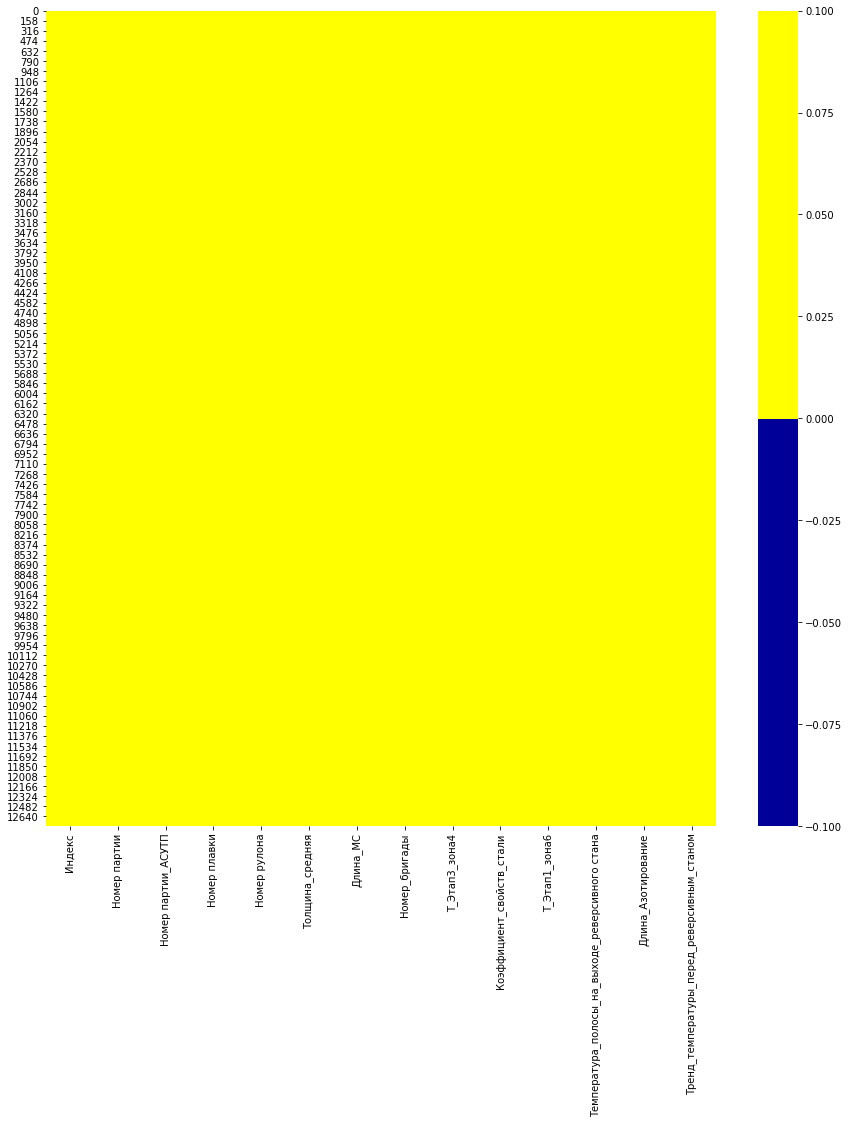

In [778]:
colours = ['#000099', '#ffff00'] 
plt.figure(figsize=(15, 15))
sns.heatmap(data_tint_only.isnull(), cmap=sns.color_palette(colours))

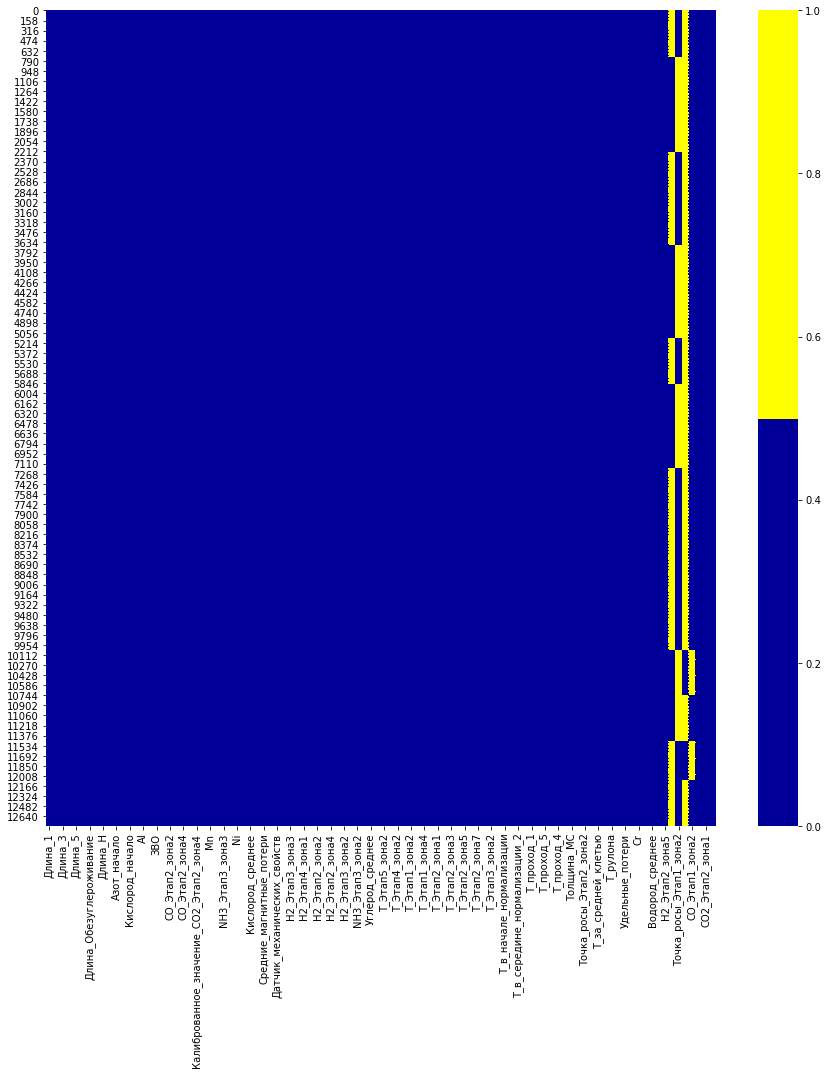

In [779]:
plt.figure(figsize=(15, 15))
sns.heatmap(data_tfloat_only.isnull(), cmap=sns.color_palette(colours))

Обратим внимание на интересное взаимное поведение переменных "CO_Этап1_зона1", "CO_Этап1_зона2" и "Точка_росы_Этап1_зона1", "Точка_росы_Этап1_зона2" соотвественно:\
там, где значения пропущенны для одной из зон, значения имеются для другой и наоборот. Следует проверить, ложаться ли объедененные значения на гладкую кривую. Возможо, в этой чати техпроцесса измерение проводилось на двух разных приборах.

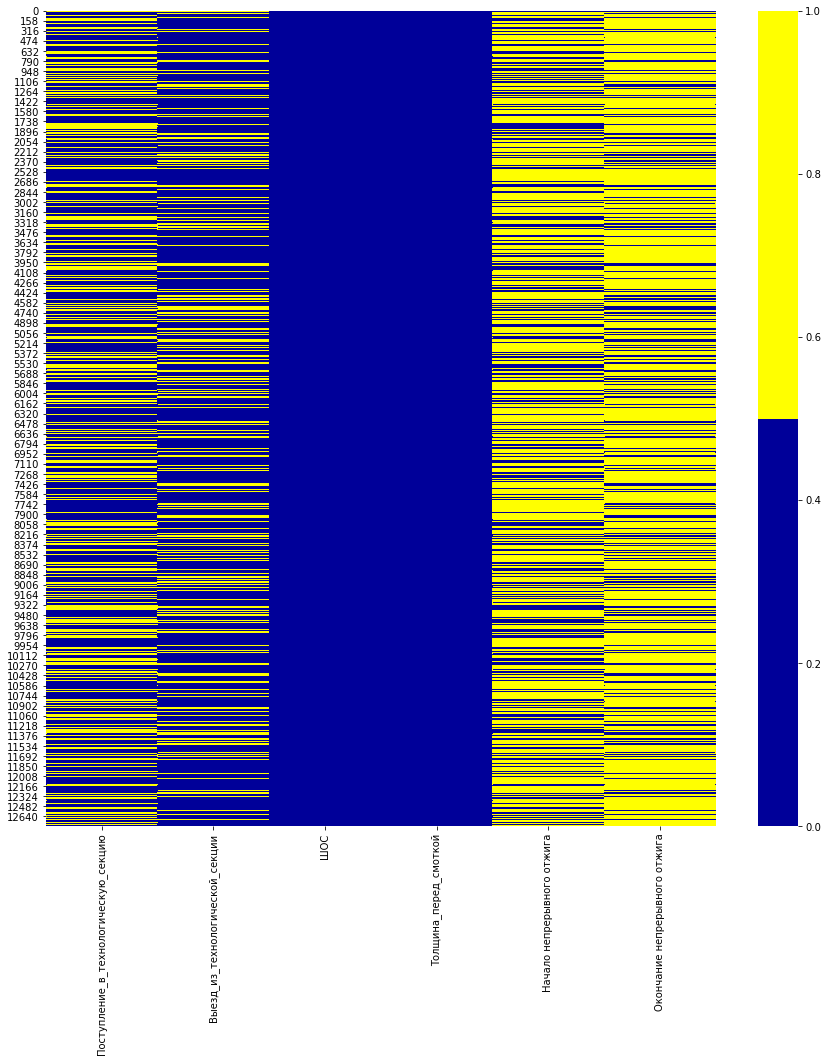

In [780]:
plt.figure(figsize=(15, 15))
sns.heatmap(data_tobject_only.isnull(), cmap=sns.color_palette(colours))

Оценим процент пропущенных значений в каждом наборе.

In [781]:
def show_pct_missing(data):
    for col in data.columns:
        pct_missing = np.mean(data[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))

In [782]:
show_pct_missing(data_tint_only)

Индекс - 0%
Номер партии - 0%
Номер партии_АСУТП - 0%
Номер плавки - 0%
Номер рулона - 0%
Толщина_средняя - 0%
Длина_МС - 0%
Номер_бригады - 0%
T_Этап3_зона4 - 0%
Коэффициент_свойств_стали - 0%
T_Этап1_зона6 - 0%
Температура_полосы_на_выходе_реверсивного стана - 0%
Длина_Азотирование - 0%
Тренд_температуры_перед_реверсивным_станом - 0%


In [783]:
show_pct_missing(data_tfloat_only)

Длина_1 - 0%
Длина_2 - 0%
Длина_3 - 0%
Длина_4 - 0%
Длина_5 - 0%
Углерод_начало - 0%
Длина_Обезуглероживание - 0%
Длина_ГП - 0%
Длина_Н - 0%
Азот_конец - 0%
Азот_начало - 0%
Азот_среднее - 0%
Кислород_начало - 0%
N - 0%
Al - 0%
Длина__м - 0%
ЗВО - 0%
CO_Этап2_зона1 - 0%
CO_Этап2_зона2 - 0%
CO_Этап2_зона3 - 0%
CO_Этап2_зона4 - 0%
CO2_Этап1 - 0%
Калиброванное_значение_CO2_Этап2_зона4 - 0%
Si - 0%
Mn - 0%
Cu - 0%
NH3_Этап3_зона3 - 0%
Настройка_датчика_CO2_Этап2_зона4 - 0%
Ni - 0%
Кислород_конец - 0%
Кислород_среднее - 0%
Sn - 0%
Средние_магнитные_потери - 0%
S - 0%
Датчик_механических_свойств - 0%
Углерод_конец - 0%
H2_Этап3_зона3 - 0%
Скорость_технологической_секции - 0%
H2_Этап4_зона1 - 0%
H2_Этап2_зона1 - 0%
H2_Этап2_зона2 - 0%
H2_Этап2_зона3 - 0%
H2_Этап2_зона4 - 0%
H2_Этап3_зона1 - 0%
H2_Этап3_зона2 - 0%
NH3_Этап3_зона1 - 0%
NH3_Этап3_зона2 - 0%
CO_Этап2_зона5 - 0%
Углерод_среднее - 0%
Т_Этап5_зона1 - 0%
Т_Этап5_зона2 - 0%
Т_Этап4_зона1 - 0%
Т_Этап4_зона2 - 0%
T_Этап1_зона1 - 0%
T_Эт

In [784]:
show_pct_missing(data_tobject_only)

Поступление_в_технологическую_секцию - 38%
Выезд_из_технологической_секции - 26%
ШОС - 0%
Толщина_перед_смоткой - 0%
Начало непрерывного отжига - 62%
Окончание непрерывного отжига - 74%


Признаки\
"Окончание непрерывного отжига"\
"Начало непрерывного отжига"\
"Поступление_в_технологическую_секцию"\
"Выезд_из_технологической_секции"\
содержат существенную долю пропущенных значений.\
Оставльные признаки типа object не информативны для поставленной задачи,\
поскольку не относятся к техпроцессу или химическому составу.\
Это приведет к искажению обучения моделей, поэтому исключим их из датасета.

In [785]:
for col in data.columns:
    if(data[col].dtype == object):
        del data[col]

Выведем некоторую вспомогательную информацию

In [786]:
print("{} {}".format('Всего партий:', len(data['Номер партии'].unique())))
print("{} {}".format('Всего партий АСУТП:', len(data['Номер партии_АСУТП'].unique())))
print("{} {}".format('Всего плавок:', len(data['Номер плавки'].unique())))
print("{} {}".format('Классов рулонов:', len(data['Номер рулона'].unique())))


Всего партий: 18
Всего партий АСУТП: 18
Всего плавок: 5
Рулоны: 12


## Анализ целевой переменной

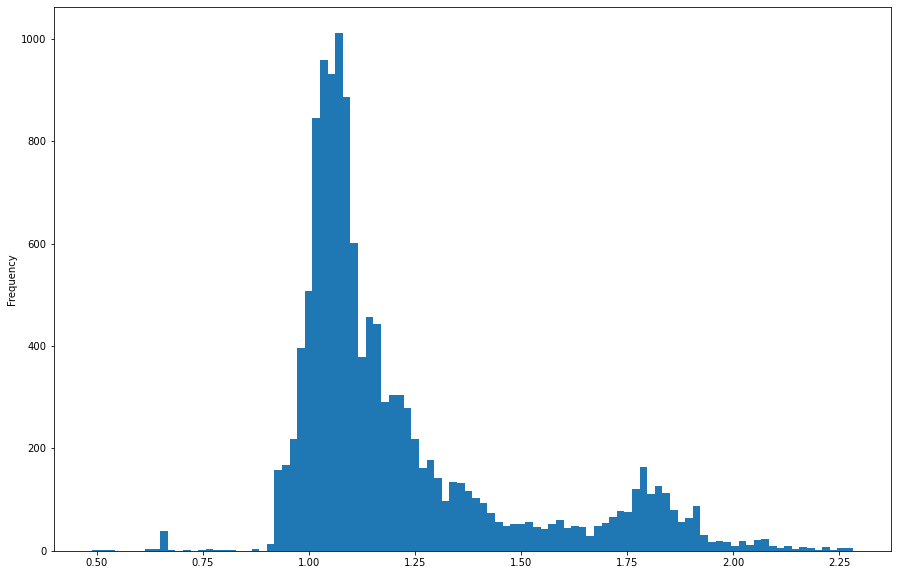

In [787]:
plt.figure(figsize=(15,10))
data['Удельные_потери'].plot.hist(bins=100)

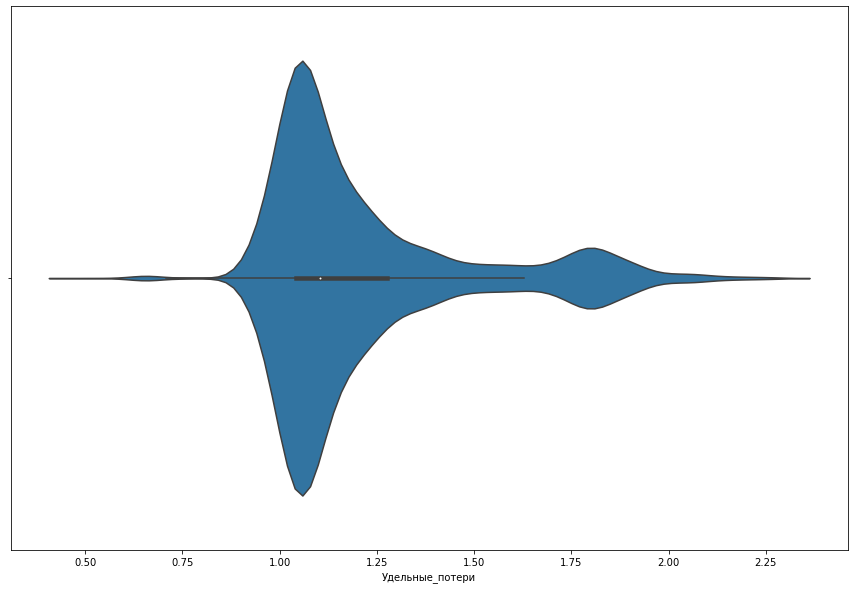

In [788]:
plt.figure(figsize=(15,10))
ax = sns.violinplot(x=data["Удельные_потери"])

In [789]:
print(data["Удельные_потери"].mean())
print(data["Удельные_потери"].std())

1.2144275662575308
0.2708741686062913


Целевая переменная имеет форму бимодального распределения.
Видны выбросы слева.
* Первая гипотеза: выборка загрязнена
* Вторая гипотеза: выборка является смесью данных из двух разных совокупностей.
* Третья гипотеза: выбранные инструменты не подходят для измерения этой величины.\
Замечание: оценить вклад релевантных переменных на правую неосновную моду распределения магнитных потерь.

Попытаемся произвести разумное разбиение датасета в соотвествии с технологическими этапами, выделяя существенные данные для моделирования целевой переменной и отбрасывая несущественные.


## Анализ химических данных

Выделим отдельно данные о химическом составе

In [790]:
import re
chem_select = re.findall(r'\b([A-z|\-.]{1,2})', str(list(data)))
chem_com = list(set(chem_select))
chem_com.remove('CO')
chem_com.remove('NH')
chem_com.remove('T_')
chem_com.remove('H')

chem_data = pd.DataFrame()
for el in chem_com:
    chem_data[el] = data[el]

In [791]:
chem_data.head()

,Sn,Cu,S,Cr,F,N,Ni,Si,Mn,Al,Ti,C
0,0.003,0.01,0.005,0.11,0.024,0.0083,0.01,3.315,0.14,0.028,0.002,0.055
1,0.003,0.01,0.005,0.11,0.024,0.0083,0.01,3.315,0.14,0.028,0.002,0.055
2,0.003,0.01,0.005,0.11,0.024,0.0083,0.01,3.315,0.14,0.028,0.002,0.055
3,0.003,0.01,0.005,0.11,0.024,0.0083,0.01,3.315,0.14,0.028,0.002,0.055
4,0.003,0.01,0.005,0.11,0.024,0.0083,0.01,3.315,0.14,0.028,0.002,0.055


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002365F8AC908>,
      dtype=object)

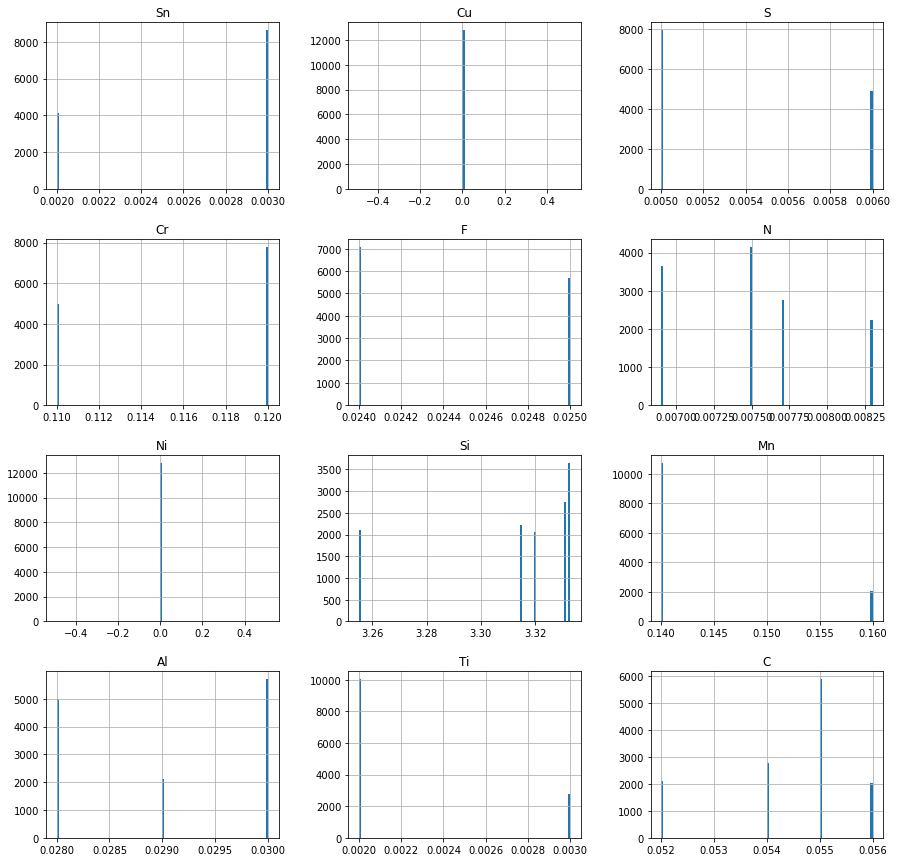

In [792]:
chem_data.hist(bins=100,figsize=(15,15))

Оценим количество переменных, отстоящих от матожидания на три стандартных отклонения

In [793]:
def outlier_std(data, col, threshold=3):
    mean = data[col].mean()
    std = data[col].std()
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

def get_column_outliers(data, columns=None, function=outlier_std, threshold=3):
    if columns:
        columns_to_check = columns
    else:
        columns_to_check = data.columns
        
    outliers = pd.Series(data=[False]*len(data), index=data_features.index, name='is_outlier')
    comparison_table = {}
    for column in columns_to_check:
        anomalies, upper_bound, lower_bound = function(data, column, threshold=threshold)
        comparison_table[column] = [upper_bound, lower_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)]
        outliers[anomalies[anomalies].index] = True
    
    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
    
    return comparison_table, outliers

def anomalies_report(outliers):
    print("Total number of outliers: {}\nPercentage of outliers:   {:.2f}%".format(
            sum(outliers), 100*sum(outliers)/len(outliers)))

In [794]:
data_features = chem_data.iloc[:, :]

In [795]:
comparison_table, std_outliers = get_column_outliers(data_features)
anomalies_report(std_outliers)

Total number of outliers: 0
Percentage of outliers:   0.00%


In [796]:
comparison_table

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
Sn,0.004080,0.001270,0.0,0.0
Cu,0.010000,0.010000,0.0,0.0
S,0.006837,0.003924,0.0,0.0
Cr,0.130733,0.101469,0.0,0.0
F,0.025936,0.022954,0.0,0.0
N,0.008927,0.006096,0.0,0.0
Ni,0.010000,0.010000,0.0,0.0
Si,3.396358,3.232648,0.0,0.0
Mn,0.165212,0.121196,0.0,0.0
Al,0.031792,0.026319,0.0,0.0


Выполним кластеризацию методом t-SNE.

In [797]:
from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist
from sklearn.preprocessing import RobustScaler

class DistanceOutliers(BaseEstimator):
    def __init__(self, metric='euclidean', percentile=90):
        self.metric = metric
        self.percentile = percentile
        
    def fit(self, X):
        self.centroid = np.mean(X, axis=0).values.reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)
        
    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        return predictions

Произведем нормализацию данных

In [798]:
data_features = chem_data.iloc[:, :]
scaler = RobustScaler()
scaled_data = pd.DataFrame(
    data=scaler.fit_transform(data_features), 
    columns=data_features.columns
)

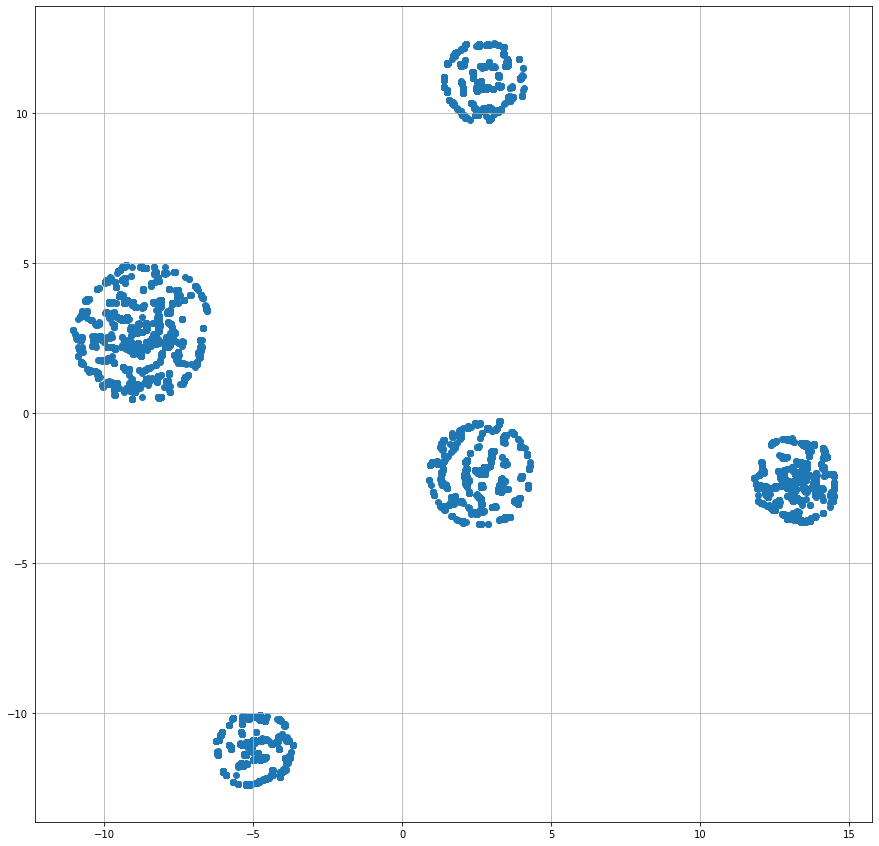

In [799]:
from MulticoreTSNE import MulticoreTSNE as TSNE
tsne = TSNE(perplexity=50, n_jobs=-1)
tsne_transformed = tsne.fit_transform(scaled_data)

plt.figure(figsize=(15, 15))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1]);
plt.grid(True)

In [800]:
def anomalies_report(outliers):
    print("Total number of outliers: {}\nPercentage of outliers:   {:.2f}%".format(
            sum(outliers), 100*sum(outliers)/len(outliers)))
euclidian_model = DistanceOutliers(metric='euclidean', percentile=90)
euclidian_model.fit(scaled_data)
euclidian_outliers = euclidian_model.predict(scaled_data)
anomalies_report(euclidian_outliers)

Total number of outliers: 0
Percentage of outliers:   0.00%


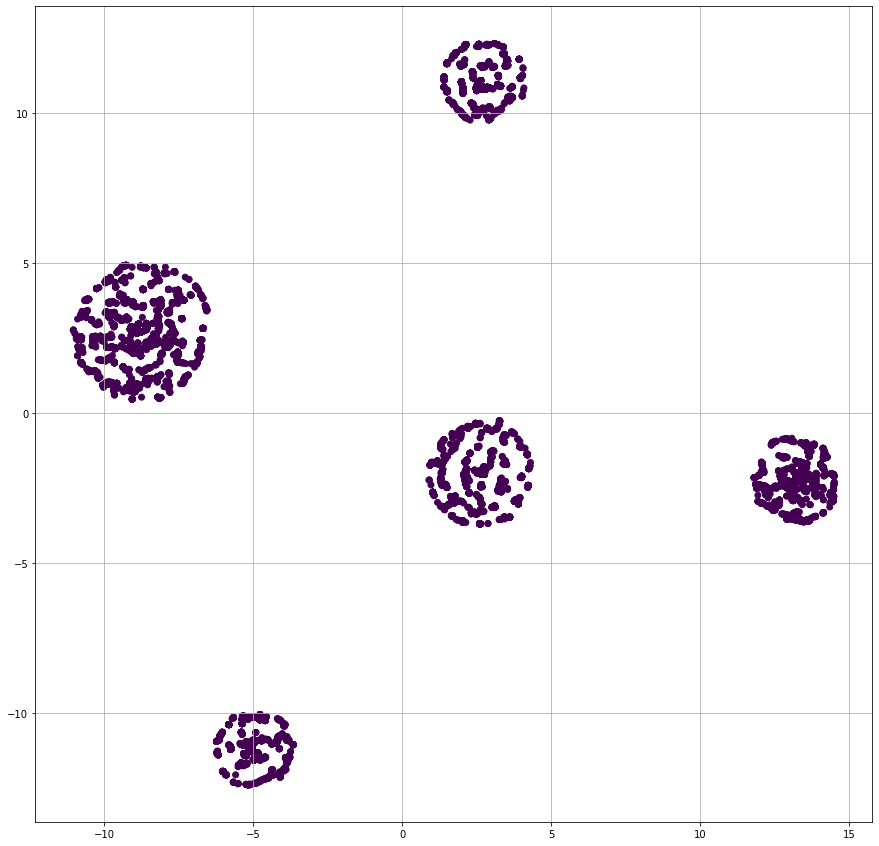

In [801]:
plt.figure(figsize=(15, 15))
plt.grid(True)
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=euclidian_outliers);

Данные о химическом составе полны, не имеют выбросов или пропущенных значений.\
Ожидается отрицательная корреляция между S и Si, поскольку высокое содержание кремния способствует глубокому раскислению и удалению из металла серы.
Построим корреляционную матрицу данных о химическом составе и целевой переменной.

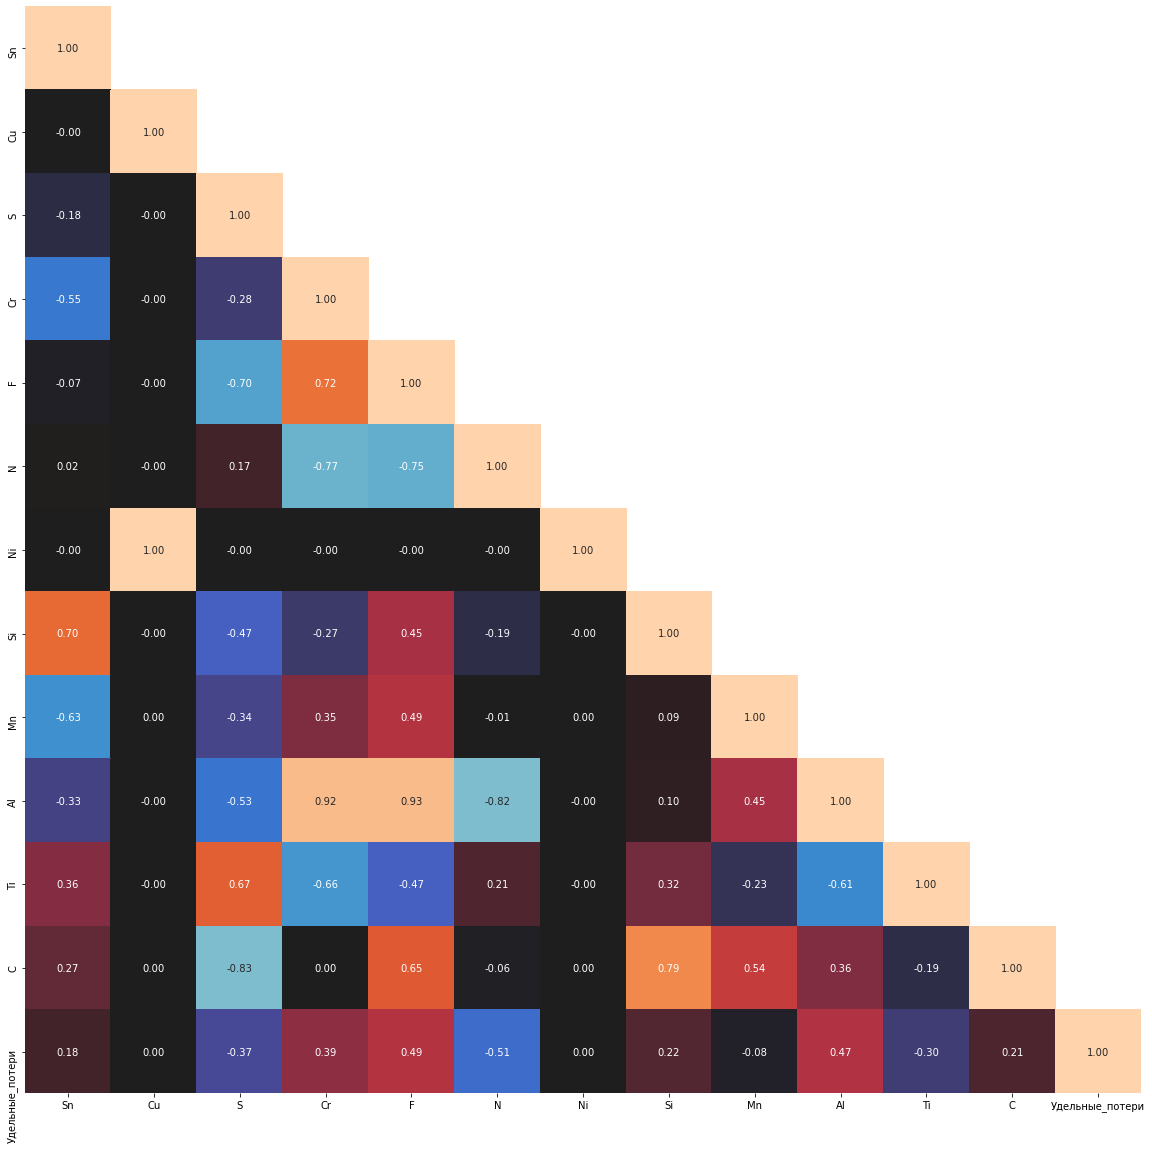

In [802]:
chem_data['Удельные_потери'] = data['Удельные_потери']
corr_matrix = chem_data.corr()
plt.figure(figsize=(20, 20))
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape),).astype(np.bool))
sns.heatmap(lower, annot=True, fmt='.2f', cbar=False, center=0)
#del chem_data['Удельные_потери']

Наиболее скоррелированные признаки

In [803]:
high_corr = [
    column for column in lower.columns if any((lower[column] > 0.8)|(lower[column] < -0.8))
]
high_corr

['Sn',
 'Cu',
 'S',
 'Cr',
 'F',
 'N',
 'Ni',
 'Si',
 'Mn',
 'Al',
 'Ti',
 'C',
 'Удельные_потери']

In [804]:
other_features = [col for col in data.columns if col not in high_corr]

In [805]:
#sns.pairplot(data[other_features]);

In [808]:
data_features = data.iloc[:, :]

In [809]:
# plt.figure(figsize=(10, 10))
# plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=euclidian_outliers);
scaled_data.dropna()
scaled_data.head()

,Sn,Cu,S,Cr,F,N,Ni,Si,Mn,Al,Ti,C
0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,-0.888889,0.0,-0.5,0.0,0.0
1,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,-0.888889,0.0,-0.5,0.0,0.0
2,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,-0.888889,0.0,-0.5,0.0,0.0
3,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,-0.888889,0.0,-0.5,0.0,0.0
4,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,-0.888889,0.0,-0.5,0.0,0.0


In [810]:
from sklearn.cluster import DBSCAN

# для начала считаем все наблюдения аномальными
outlier_percentage = 1.

num_clusters = []
anomaly_percentage = []

# берем маленький эпсилон и начинаем увеличивать
eps = 0.05
eps_history = [eps]
while outlier_percentage>0.1:    
    model = DBSCAN(eps=eps).fit(scaled_data)
    labels = model.labels_
    num_clusters.append(len(np.unique(labels))-1)
    labels = np.array([1 if label == -1 else 0 for label in labels])
    # считаем текущий процент "шума"
    outlier_percentage = sum(labels==1) / len(labels)    
    eps += 0.05
    eps_history.append(eps)
    anomaly_percentage.append(outlier_percentage)
    
model = DBSCAN(eps)
model.fit(scaled_data)
density_outlier = np.array([1 if label == -1 else 0 for label in model.labels_])

In [811]:
anomalies_report(density_outlier)

Total number of outliers: 0
Percentage of outliers:   0.00%


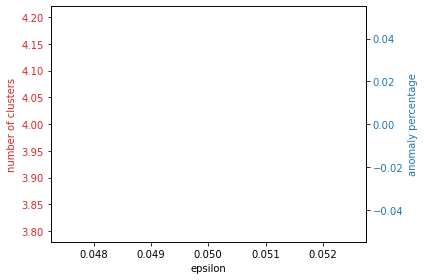

In [812]:
iterations = eps_history[:-1]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epsilon')
ax1.set_ylabel('number of clusters', color=color)
ax1.plot(iterations, num_clusters, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('anomaly percentage', color=color)  # we already handled the x-label with ax1
ax2.plot(iterations, anomaly_percentage, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [813]:
# labeled_data = data_features.copy()
# labeled_data['is_outlier'] = svm_outliers

# sns.pairplot(data=labeled_data, vars = other_features,
#              hue='is_outlier', hue_order=[1, 0],
#              markers=['x', 'o'],  palette='bright');

Произведем кластеризацию методом Isolated Fortst

In [814]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, 
                                   max_features=1.0, bootstrap=True, behaviour="new")
isolation_forest.fit(scaled_data)

isolation_outliers = isolation_forest.predict(scaled_data)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:255: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


In [815]:
anomalies_report(isolation_outliers)

Total number of outliers: 0
Percentage of outliers:   0.00%
